<a href="https://colab.research.google.com/github/soumilsuri/ML-DeepLearning-small-projects-/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

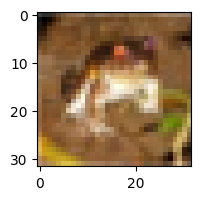

In [10]:
def plot(i):
    plt.figure(figsize=(15,2))
    plt.imshow(i)
plot(X_train[0])

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

In [29]:
CNN=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=(2, 2),),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2),),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
CNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history=CNN.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100,verbose=1,callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5140 - accuracy: 0.4536 - val_loss: 1.2306 - val_accuracy: 0.5672
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1423 - accuracy: 0.5992 - val_loss: 1.0957 - val_accuracy: 0.6120
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0086 - accuracy: 0.6468 - val_loss: 0.9997 - val_accuracy: 0.6496
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9236 - accuracy: 0.6789 - val_loss: 0.9523 - val_accuracy: 0.6678
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8619 - accuracy: 0.7014 - val_loss: 0.9275 - val_accuracy: 0.6748
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8163 - accuracy: 0.7148 - val_loss: 0.9227 - val_accuracy: 0.6856
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7645 - accuracy: 0.7337 - val_loss: 0.9512 - val_ac

In [30]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0347 - accuracy: 0.6935


[1.034727692604065, 0.6934999823570251]

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = CNN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.75      0.85      0.80      1000
           2       0.57      0.59      0.58      1000
           3       0.52      0.49      0.51      1000
           4       0.68      0.61      0.64      1000
           5       0.63      0.56      0.60      1000
           6       0.72      0.79      0.75      1000
           7       0.74      0.74      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.81      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

